In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Financials.csv')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [4]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


In [5]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

# There is no null value present in our dataset but we can see that there is an error in the column names

### For making error free columns we can use strip function to remove leading whitespaces

In [17]:
df.columns = df.columns.str.strip()

In [12]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

### Now we can see that there is no leading whitespaces

In [13]:
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

### columns like sold units has integer values as we can see but due to dollar sign it is considered as object data type so we have to remove dollar sign and convert into int data type

In [25]:
dollar = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for column in dollar:
    df[column] = df[column].str.replace('\$', '', regex=True)

In [26]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",-,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",-,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",-,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",-,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",-,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [27]:
df['Discounts'] = df['Discounts'].replace('-','0', regex = True)

In [28]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",0,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",0,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",0,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",0,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",0,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


### for converting the object data type to float we can use astype function

In [39]:
for column in dollar:
    df[column] = df[column].replace(',', '', regex=True)

In [43]:
df['Units Sold'] = df['Units Sold'].astype(float)
df['Manufacturing Price'] = df['Manufacturing Price'].astype(float)
df['Sale Price'] = df['Sale Price'].astype(float)
df['Gross Sales'] = df['Gross Sales'].astype(float)
df['Discounts'] = df['Discounts'].astype(float)
df['Sales'] = df['Sales'].astype(float)
df['COGS'] = df['COGS'].astype(float)


In [47]:
(df['Profit'] == ' - ').sum()

0

In [53]:
df['Profit'] = df['Profit'].replace(' -   ', np.nan)

In [54]:
df['Profit']=df['Profit'].astype(float)

In [55]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

### Now we can see that all the columns which seem integer are now in float datatype

### But columns like Date and Year have not datatype as Date , so we need to convert that

In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

### We don't need year, month number and month name column because we can get these values from Date column so we can drop it

In [60]:
df = df.drop(['Month Number', 'Month Name', 'Year'], axis=1)


In [61]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

### Now the data is cleaned and organised in proper format. Further we can do Data Analysis and Visualization

In [62]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06


### County wise Analysis

In [65]:
group=df.groupby('Country').agg({'Sales':'sum', 'Profit':'sum', 'Units Sold':'sum', 'COGS':'sum'}).reset_index()

In [66]:
group.head(10)

,Country,Sales,Profit,Units Sold,COGS
0,Canada,24887654.89,3858206.39,247428.5,21358426.0
1,France,24354172.29,4032488.29,240931.0,20573151.5
2,Germany,23505340.82,3961381.32,201494.0,19824952.0
3,Mexico,20949352.11,3198923.11,203325.0,18041829.0
4,United States of America,25029830.18,3397345.68,232627.5,22034289.5


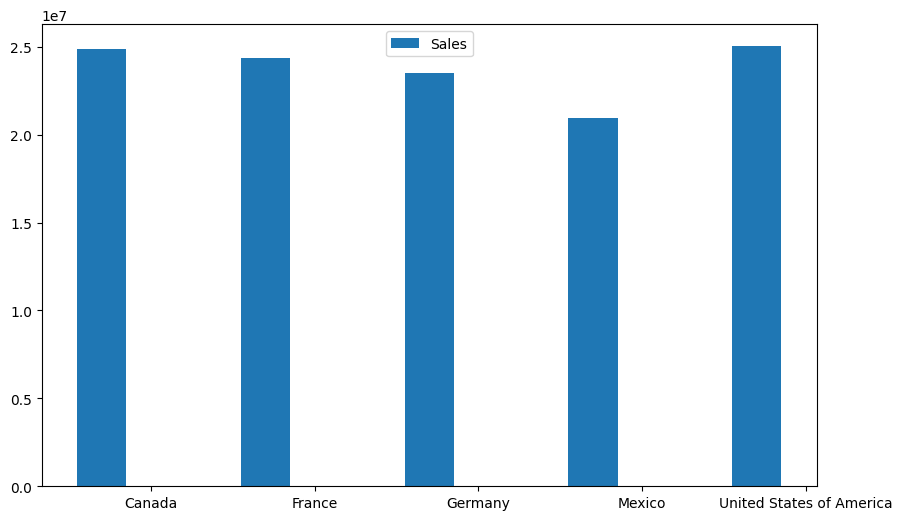

In [68]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group['Country']))
plt.bar(x-bar_width,group['Sales'], bar_width,label = 'Sales')

plt.xticks(x,group['Country'])
plt.legend()
plt.show()

### We can conclude that higest sale is recorded in USA and Canada and lowest sale is recorded in Mexico

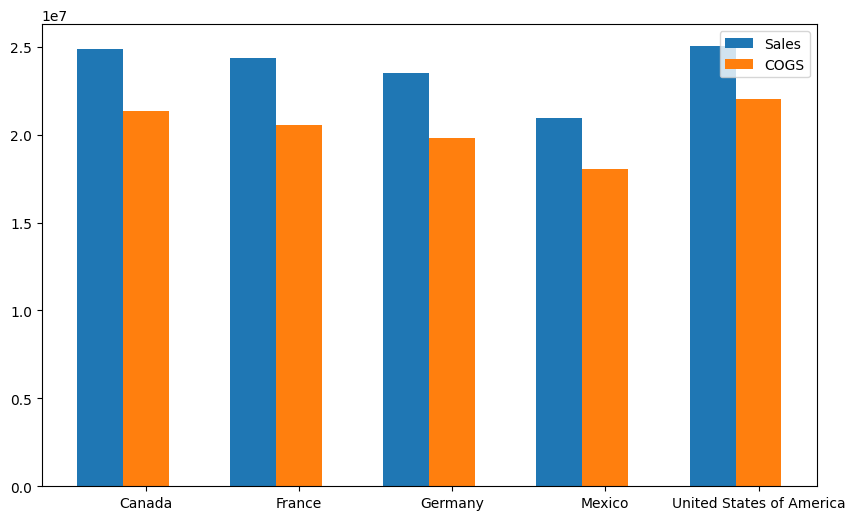

In [70]:
plt.figure(figsize=(10,6))
x = np.arange(len(group['Country']))
plt.bar(x-bar_width,group['Sales'], bar_width,label = 'Sales')
plt.bar(x,group['COGS'], bar_width,label = 'COGS')
# plt.bar(x+bar_width, group['Units Sold'],bar_width, label = 'Units Sold')

# plt.xlabel('Country')
#plt.ylabel('Values')
plt.xticks(x,group['Country'])
plt.legend()
plt.show()

### We can see that Sales is more than the COGS , therefore company is in profit

In [ ]:
plt.figure(figsize=(10,6))

plt.pie(group['Profit'], labels = group['Country'], autopct='%1.1f%%' , startangle = 140)
plt.title('Country wise Profit')
plt.show()

## Product wise Analysis

In [91]:
group_product = df.groupby('Product').agg({'Sale Price':'mean', 'Manufacturing Price':'mean', 'Units Sold':'sum', 'Gross Sales':'mean', 'Profit':'mean', 'COGS':'mean'}).reset_index()

In [76]:
# we can add one more column which contain margin that is selling price minus manufacturing price
group_product['Gross Margin']=group_product['Sale Price']-group_product['Manufacturing Price']

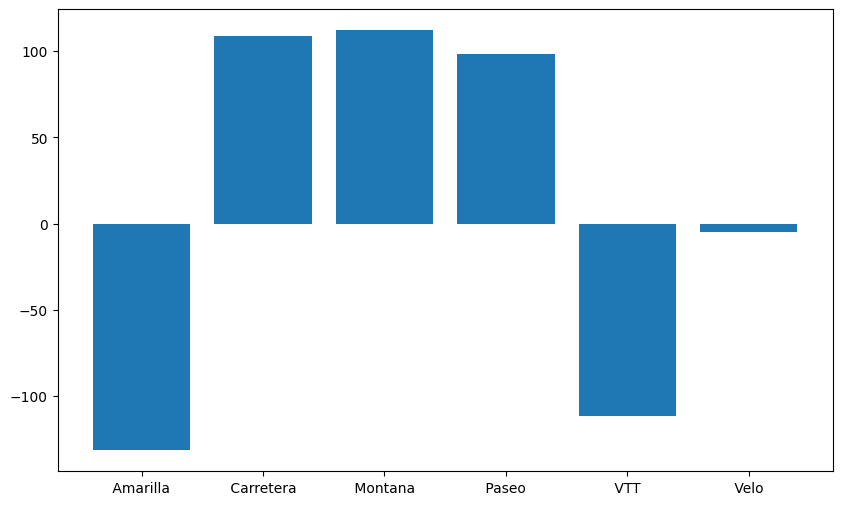

In [78]:
plt.figure(figsize=(10,6))

categories=group_product['Product']
margin_values=group_product['Gross Margin']
# Create a bar
plt.bar(categories,margin_values,label='Gross Margin')
plt.xticks(group_product['Product'])

plt.show()

### From above figure we can see that product 'Amarilla, and product 'VTT' have negative gross margin and product 'Velo' has very low margin

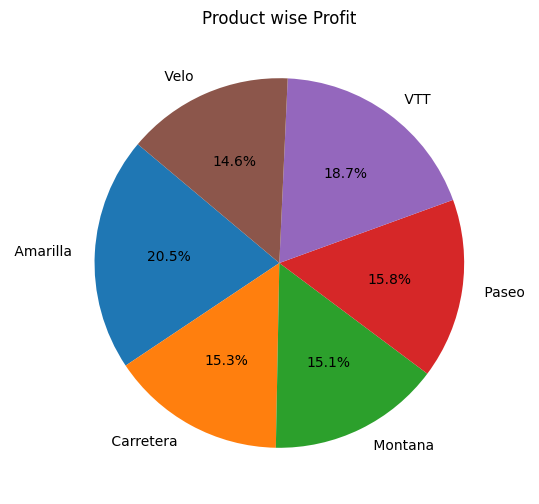

In [87]:
plt.figure(figsize=(10,6))

plt.pie(group_product['Profit'], labels =group_product['Product'], autopct='%1.1f%%' , startangle = 140)
plt.title('Product wise Profit')
plt.show()

### From the above e can see that Paseo has highest profit and Montana has the lowest pric

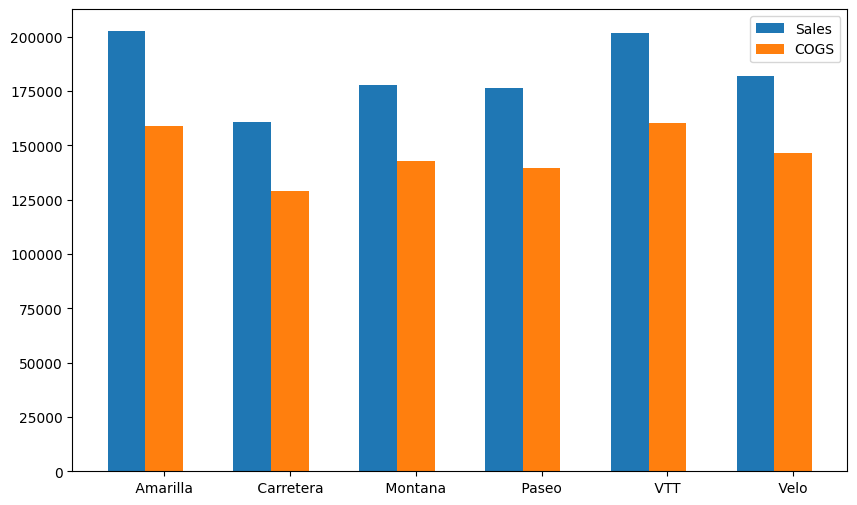

In [92]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Gross Sales'], bar_width,label = 'Sales')
plt.bar(x,group_product['COGS'], bar_width,label = 'COGS')
# plt.bar(x+bar_width, group['Units Sold'],bar_width, label = 'Units Sold')

# plt.xlabel('Country')
#plt.ylabel('Values')
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()

### Paseo has highest sales and Carretera has the lowest sales

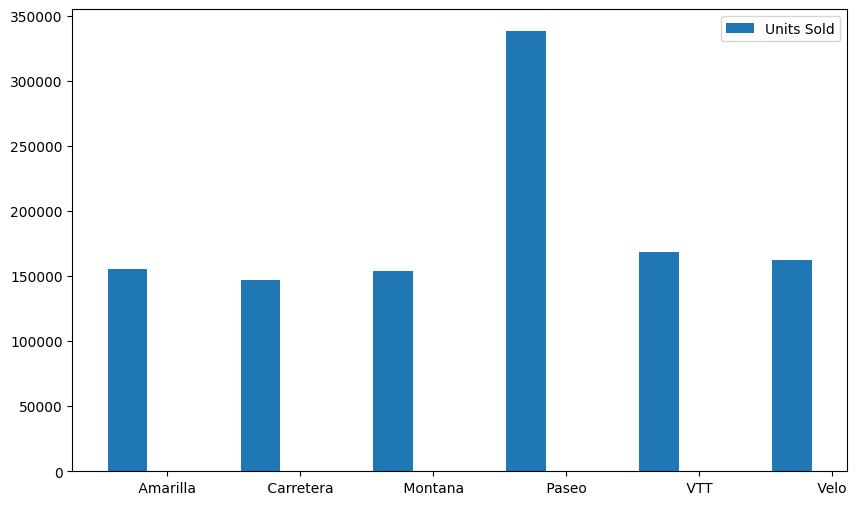

In [93]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Units Sold'], bar_width,label = 'Units Sold')
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()


### From above we can see that Paseo sold the maximum product

## Sector wise analysis

In [94]:
group_segment=df.groupby('Segment').agg({'Gross Sales':'sum', 'Profit':'sum', 'Units Sold':'sum', 'COGS':'sum'}).reset_index()

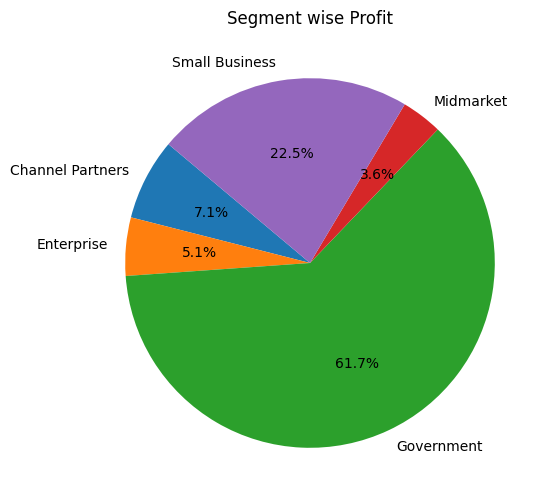

In [96]:
plt.figure(figsize=(10,6))

plt.pie(group_segment['Profit'], labels = group_segment['Segment'], autopct='%1.1f%%' , startangle = 140)
plt.title('Segment wise Profit')
plt.show()

### Government segment gives most profit and Midmarket gives least profit

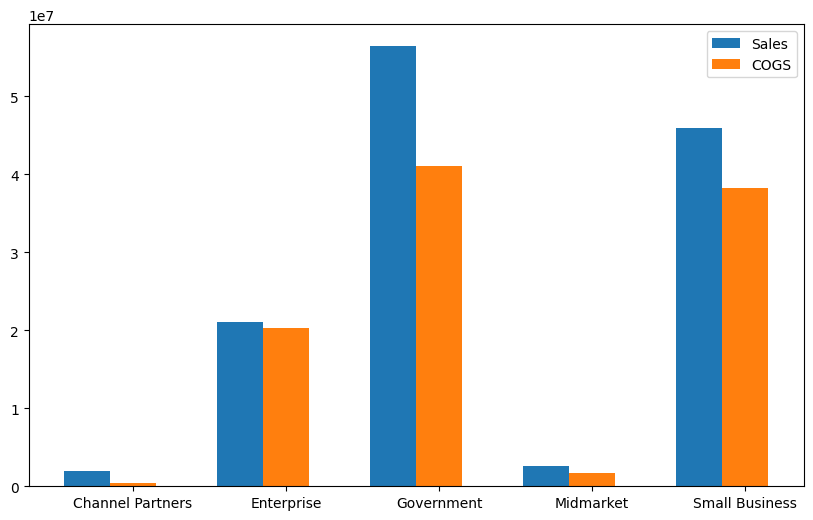

In [98]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width,group_segment['Gross Sales'], bar_width,label = 'Sales')
plt.bar(x,group_segment['COGS'], bar_width,label = 'COGS')
# plt.bar(x+bar_width, group['Units Sold'],bar_width, label = 'Units Sold')

# plt.xlabel('Country')
#plt.ylabel('Values')
plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

### In the Enterprise sector cost of Sales and COGS is almost same, so we can say that margin in that sector could be low and in government sector difference between COGS and sales is more making more margin

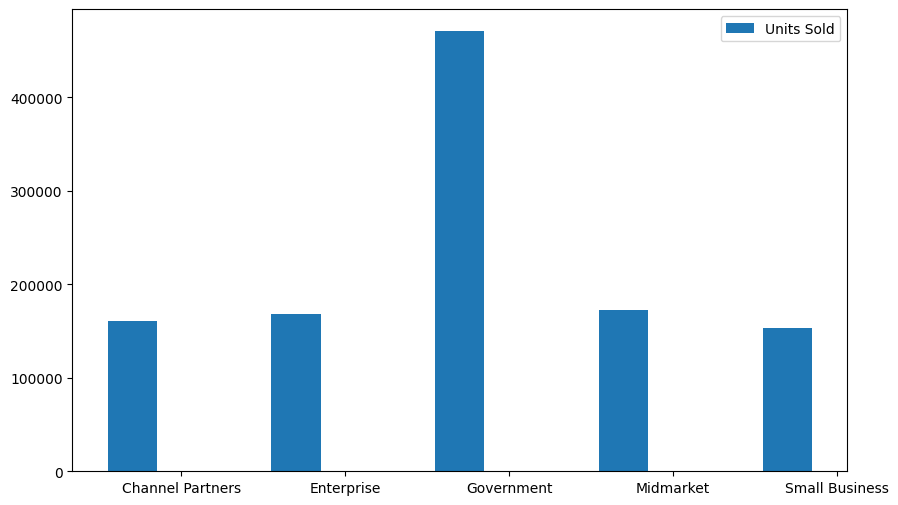

In [99]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width,group_segment['Units Sold'], bar_width,label = 'Units Sold')
plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

### More units are sold in government sector and least units are sold in small business

## Analysis by time and date

In [100]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

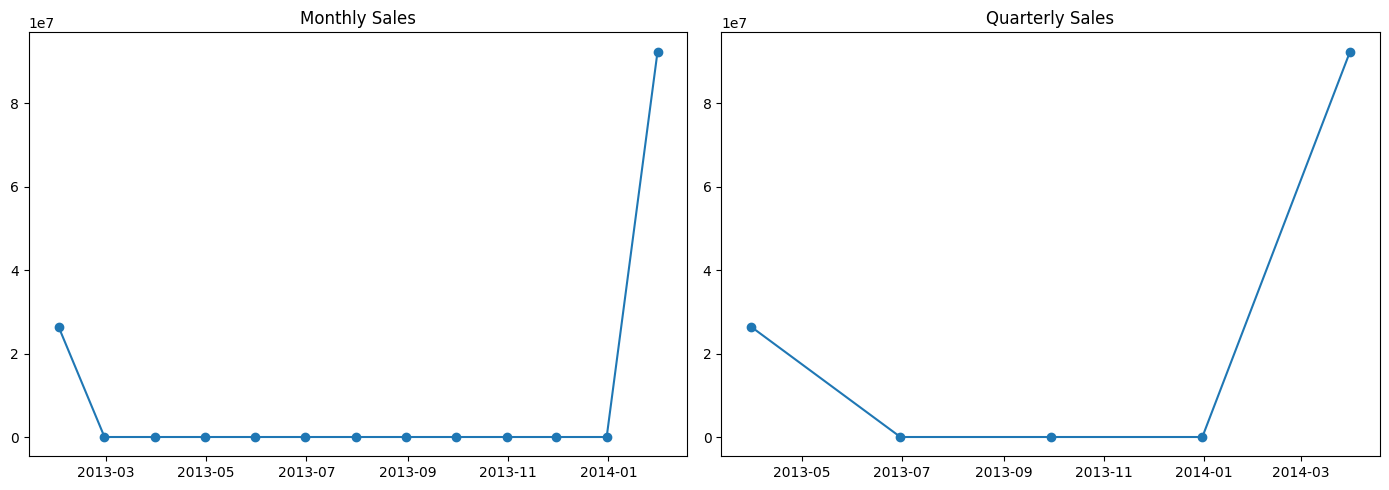

In [106]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace = True)
df.set_index('Date', inplace=True)

monthly_sales= df['Sales'].resample('M').sum()
quarterly_sales=  df['Sales'].resample('Q').sum()

# Create line graphs for monthly and quarterly sales
plt.figure(figsize=(14,5))
           
# Monthly line graph
plt.subplot(1,2,1)
plt.plot(monthly_sales,marker='o')
plt.title('Monthly Sales')
           
# Quarterly line graph
plt.subplot(1,2,2)
plt.plot(quarterly_sales,marker='o')
plt.title('Quarterly Sales')

# Show the plots
plt.tight_layout()
plt.show()

In [107]:
Yearly_profit = df['Profit'].resample('Y').sum()

In [109]:
Yearly_profit = Yearly_profit.reset_index()
Yearly_profit

,index,Date,Profit
0,0,2013-12-31,4323139.51
1,1,2014-12-31,14125205.28


In [110]:
Yearly_profit['Date'] = pd.to_datetime(Yearly_profit['Date'])

plt.figure(figsize=(10,5))
plt.bar(Yearly_profit['Date'].dt.year, Yearly_profit['Profit'], color = 'blue')

AttributeError: module 'pandas' has no attribute 'to_determine'